In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Algoritmo de Percolación

## Grafos
* Cómo representar un grafo
* Cómo crear un grafo cuadrado
* Cómo decimar un grafo de forma aleatoria

### Creando un grafo cuadrado

In [3]:
# Grafos
# Para representar un grafo, se representan las posiciones de nodos en una lista de tuples
# Para representar los enlaces, se usa una lista de conjuntos

# Nodos (posiciones)
#N = [(0, 0), (1, 0), (0, 1), (1, 1)]

# Enlaces
#E = [{1, 2}, {0, 3}, {0, 3}, {1, 2}]

# Creando un grafo cuadrado a partir de una función

def gridGraph(rows, columns, periodic=False):
    n = rows*columns
    links = []
    positions = []
    for i in range(rows):
        for j in range(columns):
            this_node = i*columns + j
            
            # arriba
            up = this_node - columns
            if up < 0:
                if periodic:
                    up = n + up
                else:
                    up = None # Frontera no periodica

            # abajo
            down = this_node + columns
            if down >= n:
                if periodic:
                    down = down - n
                else:
                    down = None # Frontera no periodica
                
            # izquierda
            if j==0:
                if periodic:
                    left = this_node + columns - 1
                else:
                    left = None # Frontera no periodica
            else:
                left = this_node - 1

            # derecha
            if j==columns-1:
                if periodic:
                    right = this_node - columns + 1
                else:
                    right = None # Frontera no periodica
            else:
                right = this_node + 1

            # agregar nodo a grafo
            linked_nodes = {up, down, left, right}
            linked_nodes.discard(None)
            links.append(linked_nodes)
            positions.append((j, -i))

    return links, positions


### Decimando un grafo

80
[set(), {11}, {12}, {4}, {3, 14}, {6, 15}, {5, 7}, {8, 17, 6}, {18, 7}, set(), {11}, {1, 10, 12, 21}, {2, 11, 22}, {23}, {24, 4, 15}, {25, 5, 14}, {26}, {7}, {8, 19}, {18}, {30}, {11, 22}, {12, 21, 23}, {33, 13, 22}, {14}, {15}, {16, 27}, {26, 28}, {27, 29, 38}, {28, 39}, {40, 20, 31}, {30}, set(), {34, 23}, {33}, set(), {37}, {36, 38, 47}, {28, 37, 39}, {49, 29, 38}, {30}, {51}, {43}, {42, 53}, {54}, set(), {47}, {48, 57, 37, 46}, {49, 58, 47}, {48, 59, 39}, {51, 60}, {41, 50}, set(), {43, 54, 63}, {64, 44, 53, 55}, {65, 54}, set(), {47}, {48, 59}, {49, 58}, {50, 70}, {62}, {72, 61, 63}, {73, 53, 62}, {74, 54}, {66, 55}, {65}, {68, 77}, {67}, {79}, {60}, set(), {62}, {74, 63}, {64, 73, 75}, {74, 76}, {75, 77}, {67, 78, 76}, {77, 79}, {69, 78}]


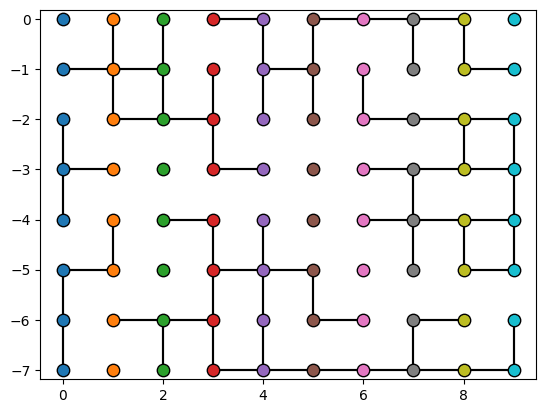

In [4]:
# Se define un función para remover un enlace aleatorio

def removeRandLinks(links, iterations):
    n = len(links)
    non_empty = list(range(n))
    for i in range(iterations):
        this_node = non_empty[np.random.randint(n)]
        while len(links[this_node])==0:
            non_empty.remove(this_node)
            n = n-1
            this_node = non_empty[np.random.randint(n)]
            
        other_node = links[this_node].pop()
        links[other_node].remove(this_node)

    return links


periodic = False
rows = 8
columns = 10
n = rows*columns
print(n)

E, N = gridGraph(rows, columns, periodic)

n_links = 2*n
if not periodic:
    n_links = n_links - rows - columns # Descontar los enlaces del borde no periódico

proportion = 0.5 # Proporción de enlaces que queremos eliminar
iterations = int(np.round(proportion*n_links))

E = removeRandLinks(E, iterations)

print(E)

for node in range(n):
    for link in E[node]:
        plt.plot([N[node][0], N[link][0]], [N[node][1], N[link][1]], color="black", zorder=0)

for node in range(n):
    plt.scatter(N[node][0], N[node][1], edgecolors="black", s=80, zorder=1)

plt.axis("equal")
plt.show()

### Encontrando clusters
Para encontrar clusters se puede usar Breadth First Search (BFS) o Depth First Search (DFS).

BFS:
* Queue Data Structure
* Memory > Processing

DFS:
* Stack Data Structure
* Processing > Memory


In [5]:
# Breadth First Search
# Se buscan nodos con BFS hasta que solo se encuentren repetidos

def findCluster(links, starting_node=0):
    queue = links[starting_node]
    explored = {starting_node}
    while len(queue) > 0:
        node = queue.pop()
        queue.update(links[node])
        queue.difference_update(explored)
        explored.add(node)

    return explored
 
# Repetir el proceso hasta que ya no haya clusters 
unexplored = set(range(n))
cluster_size = []

while len(unexplored) > 0:
    cluster = findCluster(E, unexplored.pop())
    cluster_size.append(len(cluster))
    unexplored.difference_update(cluster)

print(cluster_size)

[1, 11, 13, 1, 16, 4, 1, 1, 5, 23, 1, 1, 1, 1]


### Promedios

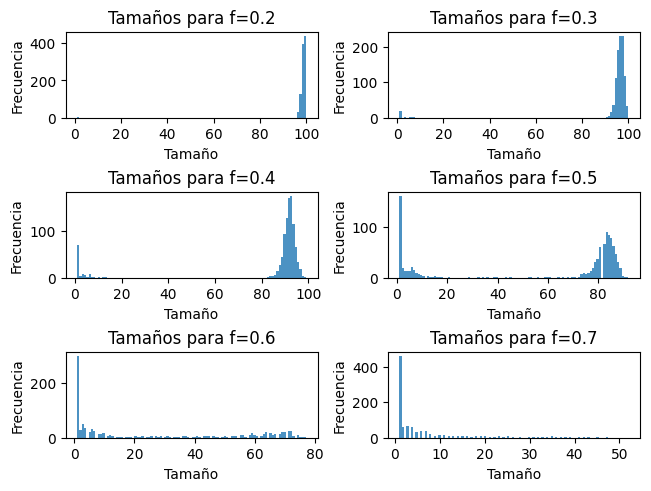

2.968724250793457


In [6]:
rows = 10
columns = 10
periodic = True
n = rows*columns
n_links = 2*n
if not periodic:
    n_links = n_links - rows - columns # Descontar los enlaces del borde no periódico
    
E_base, N_base = gridGraph(rows, columns, periodic) # Hacer el grafo base

proportions = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7] # Proporción de enlaces que queremos eliminar (decimación)
shots = 1000 # Repeticiones por cada valor de decimación

fig, axs = plt.subplots(3, 2, layout="constrained")
axs = axs.flatten()

start = time.time()

for i in range(len(proportions)):
    sizes = []
    proportion = proportions[i] # Proporción de enlaces que queremos eliminar
    iterations = int(np.round(proportion*n_links))
    for j in range(shots):
        # Copiar grafo base (se evita llamar a la función muchas veces)
        E = []
        for node in range(n):
            E.append(E_base[node].copy())

        E = removeRandLinks(E, iterations)
        
        unexplored = set(range(n))
        #cluster_size = []
        #while len(unexplored) > 0:
        #    cluster = findCluster(E, unexplored.pop())
        #    cluster_size.append(len(cluster))
        #    unexplored.difference_update(cluster)

        cluster = findCluster(E, unexplored.pop())
        cluster_size = len(cluster)

        #sizes.extend(cluster_size)
        sizes.append(cluster_size)
        
    axs[i].hist(sizes, bins=n, alpha=0.8)
    axs[i].set_title(f"Tamaños para f={proportion}")
    axs[i].set_xlabel("Tamaño")
    axs[i].set_ylabel("Frecuencia")

plt.show()

end = time.time()
print(end - start)

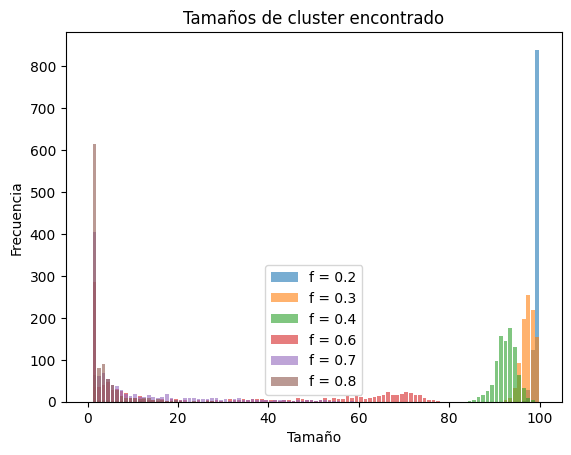

3.129582166671753


In [25]:
# En un solo eje para comparar

rows = 10
columns = 10
periodic = True
n = rows*columns
n_links = 2*n
if not periodic:
    n_links = n_links - rows - columns # Descontar los enlaces del borde no periódico
    
E_base, N_base = gridGraph(rows, columns, periodic) # Hacer el grafo base

proportions = [0.2, 0.3, 0.4, 0.6, 0.7, 0.8] # Proporción de enlaces que queremos eliminar (decimación)
shots = 1000 # Repeticiones por cada valor de decimación
bins = np.arange(0, n+1) # bins para histograma de tamaños

start = time.time()

for i in range(len(proportions)):
    sizes = []
    proportion = proportions[i] # Proporción de enlaces que queremos eliminar
    iterations = int(np.round(proportion*n_links))
    for j in range(shots):
        # Copiar grafo base (se evita llamar a la función muchas veces)
        E = []
        for node in range(n):
            E.append(E_base[node].copy())

        E = removeRandLinks(E, iterations)
        
        unexplored = set(range(n))
        #cluster_size = []
        #while len(unexplored) > 0:
        #    cluster = findCluster(E, unexplored.pop())
        #    cluster_size.append(len(cluster))
        #    unexplored.difference_update(cluster)

        cluster = findCluster(E, unexplored.pop())
        cluster_size = len(cluster)

        #sizes.extend(cluster_size)
        sizes.append(cluster_size)

    plt.hist(sizes, bins=bins, rwidth=0.8, linewidth=2, alpha=0.6, label=f"f = {proportion}")
    

plt.title(f"Tamaños de cluster encontrado")
plt.xlabel("Tamaño")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

end = time.time()
print(end - start)

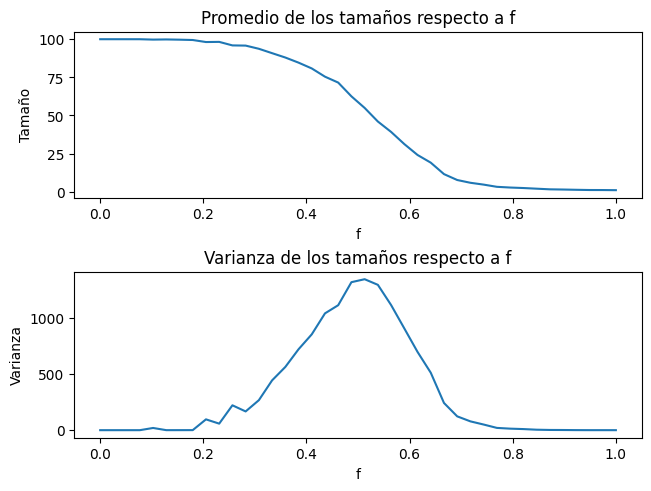

7.330018043518066


In [8]:
# Tamaño medio y desviación estándar

rows = 10
columns = 10
periodic = True
n = rows*columns
n_links = 2*n
if not periodic:
    n_links = n_links - rows - columns # Descontar los enlaces del borde no periódico
    
E_base, N_base = gridGraph(rows, columns, periodic) # Hacer el grafo base

proportions = np.linspace(0, 1, 40) # Proporción de enlaces que queremos eliminar (decimación)
shots = 500 # Repeticiones por cada valor de decimación

start = time.time()
avg = []
var = []

fig, axs = plt.subplots(2, 1, layout="constrained")

for i in range(len(proportions)):
    sizes = []
    proportion = proportions[i] # Proporción de enlaces que queremos eliminar
    iterations = int(np.round(proportion*n_links))
    for j in range(shots):
        # Copiar grafo base (se evita llamar a la función muchas veces)
        E = []
        for node in range(n):
            E.append(E_base[node].copy())

        E = removeRandLinks(E, iterations)
        
        unexplored = set(range(n))

        cluster = findCluster(E, unexplored.pop())
        cluster_size = len(cluster)

        sizes.append(cluster_size)

    avg.append(np.mean(sizes))
    var.append(np.var(sizes))


axs[0].plot(proportions, avg)
axs[0].set_title("Promedio de los tamaños respecto a f")
axs[0].set_xlabel("f")
axs[0].set_ylabel("Tamaño")

axs[1].plot(proportions, var)
axs[1].set_title("Varianza de los tamaños respecto a f")
axs[1].set_xlabel("f")
axs[1].set_ylabel("Varianza")
plt.show()

end = time.time()
print(end - start)